In [10]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [7]:
!jt -t grade3 -f roboto -fs 12 -cellw 60% -ofs 11 -dfs 11 -T

In [12]:
!jt -t monokai -f roboto -fs 12 -cellw 60% -ofs 11 -dfs 11 -T

# 导入库

In [13]:
import baostock as bs
import pandas
import pandas as pd
from matplotlib import pyplot as plt
from common import *

# class 定义

In [14]:
class StockQuery:
    def __init__(self):
        self.stock_list = pd.DataFrame()
        self.stock = {}

    def init(self):
        msg = bs.login()
        if msg.error_code != 0:
            print("Bao stock login error, code: {}, msg: {}".format(msg.error_code, msg.error_msg))

        rs = bs.query_all_stock("2023-9-28")

        self.stock_list = rs.get_data()
        self.stock = {}

    def query(self, code, start=None, end=None) -> pd.DataFrame:
        if self.stock.keys().__contains__(code):
            return self.stock[code]

        start_date = start or '2023-04-01'
        end_date = end or '2023-9-28'

        rs = bs.query_history_k_data(code, 'date,open,high,low,close,volume', start_date=start_date,
                                     end_date=end_date)

        self.stock.update({code: rs.get_data()})
        return self.stock[code]

    def load(self, code) -> pd.DataFrame:
        if self.stock.keys().__contains__(code):
            return self.stock[code]

        file = "./stacks/{}.csv".format(code)
        if code.startswith('b') or not os.path.isfile(file):
            return pd.DataFrame()

        data = pandas.read_csv(file)
        self.stock.update({code: data})
        return data

    def load_all(self):
        code_list = self.stock_list['code']
        for code in code_list:
            if code.startswith('b'):
                continue
            data = pandas.read_csv("./stacks/{}.csv".format(code))
            self.stock.update({code: data})
        return self.stock

    def query_all(self, start=None, end=None):
        code_list = self.stock_list['code']
        for i in range(code_list.shape[0]):
            data = self.query(code_list[i])
            data.to_csv("./stacks/{}.csv".format(code_list[i]), index=False)

        return self.stock

    def __del__(self):

        # bs.logout()
        pass

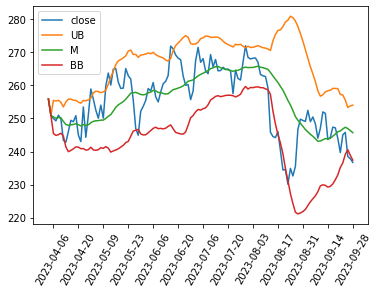

In [15]:
sq = StockQuery()
# sq.init()
data = sq.load('sz.002594')

plt.plot(data['close'], label="close")
plt.xticks(range(len(data['close']))[2::10], data['date'][2::10], rotation=60)
UB, M, BB = BOLL(data.close)
plt.plot(UB, label="UB")
plt.plot(M, label="M")
plt.plot(BB, label="BB")
plt.legend()
plt.show()

